# 順伝播

## データ
$N$次元，$M$個のデータを考える．（$X \in \mathbb{R}^{M \times N}$と書く．）
$$
X = 
\begin{pmatrix}
    \mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_N 
\end{pmatrix}
$$

（例）$3$科目，$5$人のデータ
$$
X = 
        \begin{pmatrix}
        国語の点数 & 
        数学の点数 & 
        英語の点数 
        \end{pmatrix} = 
        \begin{pmatrix}
        66 & 67 & 78 \\
        79 & 88 & 82 \\
        88 & 80 & 70 \\
        74 & 66 & 70 \\
        70 & 85 & 83 \\
        \end{pmatrix}
$$
## 入力層から１個のノードへの順伝播
出力を$\mathbf{u}_1^{(1)}$とする．（$\mathbf{u}_1^{(1)} \in \mathbb{R}^{M \times 1}$）

$X$への下のような重み（パラメータ）付き線形和を考える．

パラメータ$\mathbf{w}_1^{(1)} \in \mathbb{R}^{N \times 1}，\mathbf{b}_1^{(1)} \in \mathbb{R}^{M \times 1}$を
$$
\begin{align}
\mathbf{u}_1^{(1)} &= w_{11}^{(1)}\mathbf{x}_1+w_{12}^{(1)}\mathbf{x}_2+\cdots+w_{1N}^{(1)}\mathbf{x}_N +\mathbf{b}_1^{(1)} \\
&= X\mathbf{w}_1^{(1)}+\mathbf{b}_1^{(1)}
\end{align}
$$
![1](images/1.png)

つまり，テストの点数を例に出すと，次のような式を考えている．

$$
\begin{align}
\mathbf{u}_1^{(1)} &= w_{11}^{(1)}\mathbf{x}_{国語の点数}+w_{12}^{(1)}\mathbf{x}_{数学の点数}+w_{13}^{(1)}\mathbf{x}_{英語の点数} + \mathbf{b}^{(1)}\\
\\
&= w_{11}^{(1)}\begin{pmatrix}
        66 \\
        79 \\
        88 \\
        74 \\
        70 \\
        \end{pmatrix}
  +w_{12}^{(1)}\begin{pmatrix}
        67 \\
        88 \\
        80 \\
        66 \\
        85 \\
        \end{pmatrix}
  +w_{13}^{(1)}\begin{pmatrix}
        78 \\
        82 \\
        70 \\
        70 \\
        83 \\
        \end{pmatrix}
  +\mathbf{b}^{(1)}
\end{align}
$$

## 入力層からK個のノードへの順伝播
出力を$U$とする．（$U^{(1)} \in \mathbb{R}^{M \times K}$）

今度は，上で行なった線形和をK個のノードについて考える．（下記）

パラメータ$W^{(1)} \in \mathbb{R}^{N \times K}，B^{(1)} \in \mathbb{R}^{M \times K}$，

$$
\begin{align}
W^{(1)} = 
\begin{pmatrix}
    \mathbf{w}_1^{(1)} & \mathbf{w}_2^{(1)} & \cdots & \mathbf{w}_K^{(1)}
\end{pmatrix} \\
B^{(1)} = 
\begin{pmatrix}
    \mathbf{b}_1^{(1)} & \mathbf{b}_2^{(1)} & \cdots & \mathbf{b}_K^{(1)}
\end{pmatrix}
\end{align}
$$

として，
$$
\begin{align}
\mathbf{u}_1^{(1)} &= w_{11}^{(1)}\mathbf{x}_1+w_{12}^{(1)}\mathbf{x}_2+\cdots+w_{1N}^{(1)}\mathbf{x}_N +\mathbf{b}_1^{(1)} \\
&= X\mathbf{w}_1^{(1)}+\mathbf{b}_1^{(1)}
\end{align}
$$
$$
\begin{align}
\mathbf{u}_2^{(1)} &= w_{21}^{(1)}\mathbf{x}_1+w_{22}^{(1)}\mathbf{x}_2+\cdots+w_{2N}^{(1)}\mathbf{x}_N+\mathbf{b}_2^{(1)} \\
&= X\mathbf{w}_2^{(1)}+\mathbf{b}_2^{(1)}
\end{align} \\
\vdots \\
$$
$$
\begin{align}
\mathbf{u}_K^{(1)} &= w_{K1}^{(1)}\mathbf{x}_1+w_{K2}^{(1)}\mathbf{x}_2+\cdots+w_{KN}^{(1)}\mathbf{x}_N+\mathbf{b}_K^{(1)} \\
&= X\mathbf{w}_K^{(1)}+\mathbf{b}_K^{(1)}
\end{align}
$$

であるから，

$$
\begin{align}
U^{(1)} &= 
\begin{pmatrix}
    \mathbf{u}_1^{(1)} & \mathbf{u}_2^{(1)} & \cdots & \mathbf{u}_K^{(1)}
\end{pmatrix} \\
&= XW^{(1)}+B^{(1)}
\end{align}
$$

上記でやったことは，下記の図に基づく計算．

![2](images/2.png)

## 活性化関数を通す

上記の$U$を活性化関数$f(・)$に通す．
すなわち，$H \in \mathbb{R}^{M \times K}$として，

$$
H = f(U) 
$$

である．（多少雑な表記）

後は，この操作を繰り返せば順伝播を定義できる．

In [1]:
import numpy as np
from DataLoader import DataLoader as DL
import ActivateFunction as AF
import DerivativeAF as DAF

In [54]:
class Dense:
    """
    全結合層を定義
    """
    def __init__(self, in_dim, out_dim, function):
        """
        パラメータの初期化
        """
        self.W = np.random.uniform(low=-0.08, high=0.08,
                                   size=(in_dim, out_dim)).astype("float64")
        self.b = np.zeros(out_dim).astype("float64")     
        self.function = function

    def __call__(self, x):
        """
        順伝播
        """
        self.x = x
        self.u = x @ self.W + self.b
        h = self.function(self.u)
        return h

# データ数と、次元を定義
m_data = 10000
in_dim = 10
out_dim = 1

# 定義されたデータ数と次元数のデータ（説明変数）を生成
x = np.random.randn(m_data, in_dim)

# パラメータを適当な値に設定．
w = np.random.randn(in_dim, out_dim)
b = np.ones((m_data,1))

# 目的変数を生成．
y = x @ w + b

# データを分割するクラスを呼び出す．
# y.shape[0]は全データを指定するので，バッチ学習
dl = DL(x, batch_size=y.shape[0])

# 全結合層のインスタンスを生成
input_layer = Dense(in_dim, 4, AF.identity)
hidden_layer1 = Dense(4, 5, AF.ReLU)
out_layer = Dense(5, out_dim, AF.identity)

# 順伝播を試してみる．
epochs = 1
for i in range(epochs):
    for data in dl:
        print(out_layer(hidden_layer1(input_layer(data))))
    print()

[[-5.65684223e-05]
 [-9.84647657e-05]
 [ 5.57165742e-05]
 ...
 [ 3.90182516e-04]
 [ 3.49068124e-05]
 [ 7.37962654e-04]]



# 誤差逆伝播法

先ほどの結果から，モデルの出力結果を得た．

そこで，そのモデルの出力結果と正解（真の値）とを見比べて，パラメータを更新することを考える．

## 誤差関数

下図（中間層１層のNN）のように得られた誤差関数を$J$とする．

![3.png](images/3.png)

## パラメータの更新

パラメータの更新については，勾配降下法を使う．


## 誤差関数$J$の$W^{OUT}$による偏微分

これは，今まで通り誤差関数を出力層に向かう重みで偏微分して，求めれば良い．

![4.png](images/4.png)
$$
\frac{\partial{J}}{\partial{w}_{kj}^{(OUT)}} = \frac{\partial J}{\partial t} \frac{\partial t}{\partial{w}_{kj}^{(OUT)}} = \frac{\partial J}{\partial t} h_k^{(1)}
$$
## 誤差関数$J$の$W^{1}$による偏微分

各パラメータによる誤差関数の偏微分を求める．

しかし，入力層に近づくほどネストされるので，求めるのが困難になる．→連鎖律による誤差逆伝播法を用いる．

![5.png](images/5.png)

ある層$l$の偏微分を
$$
\frac{\partial{J}}{\partial{w}_{kj}^{(l)}}
$$

とする．

この時，連鎖律より，

$$
\frac{\partial{J}}{\partial{w}_{kj}^{(l)}}=\frac{\partial{J}}{\partial{u}_{k}^{(l)}}\frac{\partial{u}_{k}^{(l)}}{\partial{w}_{kj}^{(l)}}=\delta_{k}^l h_k^{(l-1)}
$$

さらに，
$$
\delta_{k}^l=\frac{\partial{J}}{\partial{u}_{k}^{(l)}}=\frac{\partial{J}}{\partial{h}_{k}^{(l)}}\frac{\partial{h}_{k}^{(l)}}{\partial{u}_{k}^{(l)}}
$$

ここで，
$$
\frac{\partial{h}_{k}^{(l)}}{\partial{u}_{k}^{(l)}} = f^\prime({u}_{k}^{(l)})
$$
また，

$$
\delta_{k}^l = \sum_{k=1}^{K} \frac{\partial J}{\partial u_k^{(l+1)}} \frac{\partial u_k^{(l+1)}}{\partial h_j^{(l)}} \frac{\partial h_j^{(l)}}{\partial u_j^{(l)}}
$$

よって，

$$
\frac{\partial J}{\partial u_k^{(l+1)}} = \delta_{k}^{(l+1)} \\
\frac{\partial h_j^{(l)}}{\partial u_j^{(l)}} = f^{\prime}(u_j^{(l)}) \\
\frac{\partial u_k^{(l+1)}}{\partial h_j^{(l)}} = w_{kj}^{(l+1)}
$$

つまり，
$$
\delta_{k}^{(l)} = f^{\prime}(u_j^{(l)}) \sum_{k=1}^{k=K} \delta_{k}^{(l+1)}w_{kj}^{(l+1)}
$$

In [55]:
class Dense:
    """
    全結合層を定義
    """
    def __init__(self, in_dim, out_dim, function, deriv_function):
        """
        パラメータの初期化
        """
        self.W = np.random.uniform(low=-0.08, high=0.08,
                                   size=(in_dim, out_dim)).astype("float64")
        self.b = np.zeros(out_dim).astype("float64")     
        self.function = function
        self.deriv_function = deriv_function

    def __call__(self, x):
        """
        順伝播
        """
        self.x = x
        self.u = x @ self.W + self.b
        h = self.function(self.u)
        return h
    def back_propagation(self, delta, W):
        """
        誤差逆伝播（l+1層目の誤差から，l層目の誤差を求める）
        """
        self.delta = (self.deriv_function(self.u) * delta) @ W.T
        return self.delta
    
    def compute_grad(self):
        """
        求めた誤差から，勾配を計算
        """
        batch_size = self.delta.shape[0]

        self.dW = self.x.T @ self.delta / batch_size
        self.db = np.ones(batch_size) @ self.delta / batch_size


In [64]:
# Denseを用いて計算

alpha = 0.01
batch_size = y.shape[0]


# 全結合層のインスタンスを生成
input_layer = Dense(in_dim, 4, function=AF.ReLU, deriv_function=DAF.deriv_relu)
hidden_layer1 = Dense(4, 5, function=AF.ReLU, deriv_function=DAF.deriv_relu)
out_layer = Dense(5, out_dim, function=AF.identity, deriv_function=DAF.deriv_identity)

# まずは，順伝播．
dl_x = DL(x, batch_size=100)
dl_y = DL(y, batch_size=100)
epochs = 1000
for epoch in range(epochs):
    for x, y in zip(dl_x, dl_y):
        t = out_layer(hidden_layer1(input_layer(x)))
        # 出力層の誤差を計算．
        delta_out = y - t
        # 各層に誤差を逆伝播．
        out_layer.back_propagation(delta_out, out_layer.W)
        hidden_layer1.back_propagation(out_layer.delta, hidden_layer1.W)
        input_layer.back_propagation(hidden_layer1.delta, input_layer.W)
        
        # 各層の勾配を計算
        out_layer.compute_grad()
        hidden_layer1.compute_grad()
        input_layer.compute_grad()
        
        # 勾配に基づいて，各層をupdate
        out_layer.W -= alpha * out_layer.W
        hidden_layer1.W -= alpha * hidden_layer1.W
        input_layer.W -= alpha * input_layer.W
        
    if epoch == 300:
        alpha /= 10
    if epoch % 100 == 0:
        print(f"EPOCH: {epoch}")
        print(f"ERROR: {np.linalg.norm(y - out_layer(hidden_layer1(input_layer(x))))**2/(2*m_data)}")

EPOCH: 0
ERROR: 0.03775730053558299
EPOCH: 100
ERROR: 0.03776193584967269
EPOCH: 200
ERROR: 0.037762043030243955
EPOCH: 300
ERROR: 0.037762047314650306
EPOCH: 400
ERROR: 0.037762047424122355
EPOCH: 500
ERROR: 0.0377620475042307
EPOCH: 600
ERROR: 0.037762047576130775
EPOCH: 700
ERROR: 0.03776204752469007
EPOCH: 800
ERROR: 0.03776204770230614
EPOCH: 900
ERROR: 0.037762047734421864


(array([ 7.,  8., 14., 16., 18., 13., 12.,  6.,  1.,  5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

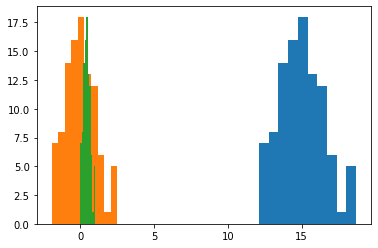

In [97]:
class Model():
    

(array([3., 0., 0., 5., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

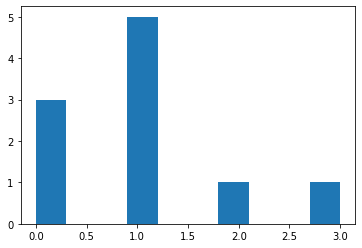

In [83]:
plt.hist(abnormal)

(array([3., 0., 0., 5., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

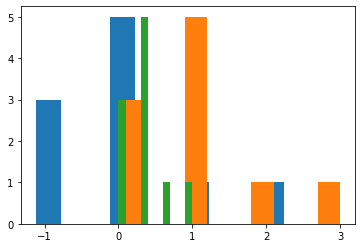

In [87]:
abnormal = np.random.poisson(lam=1., size=10)
abnormal_st = (abnormal - abnormal.mean())/abnormal.std()
abnormal_nor = (abnormal - abnormal.min())/(abnormal.max() - abnormal.min()) 
plt.hist(abnormal_st)
plt.hist(abnormal)
plt.hist(abnormal_nor)

(array([18., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

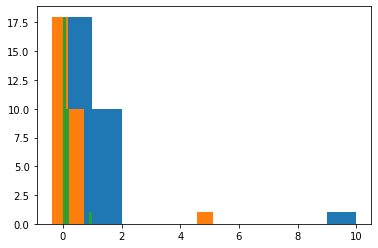

In [100]:
a = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1, 1, 1, 1,1, 1, 1,1 ,1 ,1, 10])
a_st = (a - a.mean())/a.std()
a_nor = (a - a.min())/(a.max() - a.min()) 

plt.hist(a)
plt.hist(a_st)
plt.hist(a_nor)